 1 - Introduction to Causality




Outline

Review:
Motivation
Causality
Causal Inference
Statistical Inference: Causes of Poverty in England
Experimental Analysis: Thornton HIV Study
Minimum Wage on The Employment

Review

---
## Motivation
- Many of the interesting questions in research we might want to answer with data are causal
  - Economics : How does supply and demand (causally) depend on price?
  - Policy : Are job training programmes actually effective?
  - Business : What is the effect of new feature to churn rate?
- We want to able answering causal question, “Does X cause Y?”, “What’s the effect of X on Y”, etc.
- Learning causality helps us understand why things happen, and not just what happens. It allows us explain phenomena, and make decisions based on evidence rather than just correlation.
---
## Causality
- X causes Y If were we *intervene* and **change the value of X without changing anything else**, then the **distribution of Y would also change as a result**
- Example of causation that are correlated: A lamp switch being set to on causes the lamp to be on
- Example of causation that have no correlation: The sailor counteracts the wind by seems randomly adjusting the rudder. The boat moves in a straight line, showing no visible relationship between the rudder and boat's direction. It's a causal! The sailor is moving the rudder in response to the unobserved wind so the boat moves in straight line
- Example of correlation that are not Causal:Rooster crowing sounds are followed closely by sunrise. Not Causal! The rooster that not crowing do not cause the sun do not rise

---
## Causal Inference

- Causal Inference: estimating how events and decisions affect a specific outcome that is of interest using theoretical understanding and comprehensive knowledge of the context.
- One way of thinking about causality is via the **potential outcomes** model. We can’t observe the **counterfactual**. However, we can estimate how the outcome would have been in counterfactual. Figuring out that makes a good counterfactual estimate is a key part of causal inference!
- Randomized controlled experiment is the gold standard of causal inference method. Randomization conceptually facilitates us to have a condition where there is no structural relation between variables and treatment status, as depicted by a very low or even no variables having statistical correlation with treatment status.
- However, conducting randomization can be infeasible, unethical, impossible
- Therefore, it becomes necessary to develop a comprehensive understanding of the world and establish a model that can help us determine what the counterfactual would look like.

In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt


# Statistical Inference: Causes of Poverty in England
---

### Background
- The statistician G. Udny Yule made early use of regression analysis in the social sciences.
- Yule (1899) was interested in the causes of poverty in England.
- Poor people depended on either poorhouses or the local authorities for financial support

### Objective
Yule wanted to know if public assistance increased the number of paupers, which is a causal question.

- Yule used least squares regression to estimate the partial correlation between public assistance and poverty.
- This data was drawn from the English censuses of 1871 and 1881, the data was made available by the Author of Causal Inference: The Mixtape in his github

### Read Data

In [2]:
# Read Data
yule = pd.read_stata('yule.dta')

# Print the shape of data
print(yule.shape)

# Show fifth first rows of data
yule.head()

(32, 5)


,location,paup,outrelief,old,pop
0,Kensington,27,5,104,136
1,Paddington,47,12,115,111
2,Fulham,31,21,85,174
3,Chelsea,64,21,81,124
4,St. George’s,46,18,113,96


- Variables name definitions::
  - `location` : Location in England
  - `paup` : Pauperism Growth
  - `outrelief` : Poverty Relief Growth
  - `old` : Annual growth in aged population
  - `pop` : Annual growth in population
- From https://www.collinsdictionary.com/, outrelief means money given to poor people not living in a workhouse

- Each rows represent poupers, outrelief, population, and age population growth rate in a particular location in England (e.g., Chelsea, Strand).

### Regression

- Here’s an example of the regression one might run using these data:

$$\text{Pauper}=\alpha+\delta \text{Outrelief}+\beta_1 \text{Old} + \beta_2 \text{Pop} + u$$

where
$\alpha$ is the intercept,
$\delta$ is the elasticity of outrelief,
$\beta_1$ is the coefficient on the relationship between Old and Pauper,
$\beta_2$ is the coefficient on the relationship between Pop and Pauper, and
$u$ is the error term.

- Each variable in the analysis is represented as an annual growth rate. As a result, regression coefficients in this context have elasticity interpretations.
- The outrelief elasticity of pauper, $\delta$ is the ratio of percentage changes in pauper to outrelief.
- Elasticities are causal objects rather than mere correlations between variables. However, it's important to note that the data analyzed may not meet the necessary conditions for interpreting these relationships as causal.
- Caution should be exercised when interpreting the results in light of the limitations in Yule's data.

In [3]:
# Create OLS model object
model = smf.ols('paup ~ outrelief + old + pop', yule)

# Fit the model
results = model.fit()

# Print the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   paup   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     21.49
Date:                Fri, 18 Jul 2025   Prob (F-statistic):           2.00e-07
Time:                        21:59:41   Log-Likelihood:                -115.47
No. Observations:                  32   AIC:                             238.9
Df Residuals:                      28   BIC:                             244.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     63.1877     27.144      2.328      0.0

### Interpretation

- In words, a 10-percentage-point change in the out-relief growth rate is **associated** with a 7.5-percentage-point increase in the pauperism growth rate.
- Yule used his regression to calculate the correlation between out-relief and pauperism, leading him to infer that public assistance contributed to an increase in pauper growth rates.

### Limitations of Regression Analysis for Causal Inference

- The author of the study didn't account for economic factors and the potential for reverse causality, limiting the validity of their findings.
- Early adopters of new methodologies often face criticism, but the absence of alternative regression methods in context of causal inference during that time period should be acknowledged.
- The naı̈ve use of regression to estimate correlations as a means of making causal claims has been prevalent for a long time and is unlikely to disappear soon.
- Overall, caution should be exercised when relying solely on regression analysis for drawing causal inferences in important policy debates.

# Experimental Analysis: Thornton HIV Study
---

### Background
- The common belief was that individuals learning their HIV status would lead to precautionary measures, slowing the infection rate.
- The assumption was that knowledge of being infected would result in seeking medical treatment, prolonging life and improving quality of life.
- Increased testing was expected to create behavioral changes in high-risk behavior, slowing the spread of the epidemic.
- Thornton challenged these assumptions with an field experiment in rural Malawi, where cash incentives were provided to encourage individuals to follow up and learn their HIV test results.


### The Study
- Thorton's experiment was a complex study with various aspects, but we will specifically focus on the cash-transfer aspect in the form of vouchers.
- The experiment involved **randomized assignment** of cash transfers, **enabling the identification of causal effects on learning HIV status**.
- By using randomized assignment, Thorton ensured that the treatment assignment was independent of potential outcomes, establishing a strong causal framework.
- Although we cannot directly observe potential outcomes, the design of randomization guarantees independence between treatment and outcomes.

### Objective
Investigating whether cash incentives caused people to learn their HIV status and the cascading effect of that learning on subsequent risky sexual behavior

### Load Data

- Respondents in rural Malawi were offered a free door-to-door HIV test as part of the experiment.
- They were randomly assigned either **no voucher** or **vouchers** ranging from `$1` to `$3`.
- The vouchers could be redeemed at a nearby voluntary counseling and testing center (VCT).
- Here's the data from the experiment. note that we only included relevant variables needed

In [6]:
# Read the data
hiv = pd.read_csv("hiv.csv")

# Print the shape of data
print(hiv.shape)

# Show fifth first rows of data
hiv.head()

(4820, 19)


,age,male,hiv2004,educ2004,land2004,usecondom04,got,any,villnum,tinc,under,rumphi,balaka,Ti,numcond,anycond,bought,survey2004,followupsurvey
0,22.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,2.08032,0.0,0.0,1.0,300.0,6.0,1.0,1.0,1.0,1.0
1,44.0,0.0,NaN,2.0,1.0,0.0,NaN,NaN,1.0,NaN,0.0,0.0,1.0,NaN,NaN,NaN,NaN,1.0,0.0
2,19.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,1.0,1.89120,0.0,0.0,1.0,200.0,3.0,1.0,0.0,1.0,1.0
3,30.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0
4,53.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.09456,0.0,0.0,1.0,50.0,0.0,0.0,0.0,1.0,1.0


Variable description that we will use:
- `any`: an indicator variable for if the participant received any incentive.
- `got`: denotes that the individual went and got their test result information.
- `tinc`: total value of incentives
- `hiv2004`: whether they had HIV in the baseline
- `usecondom04`: whether they used condoms in the baseline
- `numcond`: number of condoms purchased at the follow‐up survey
- `anycond`: indicator of any condoms purchased at the follow‐up survey
- `bought`: indicator if bought any condoms at the time of the follow‐up survey
- `survey2004`: completed baseline survey in 2004 (1=completed)
- `followupsurvey`: indicator if was interviewed at the follow‐up survey in 2005

### Missing Value Checking

In [7]:
hiv.isna().sum()

,0
age,441
male,0
hiv2004,1926
educ2004,1666
land2004,1558
usecondom04,1813
got,1926
any,1919
villnum,27
tinc,1919


### Drop Missing Value

We need complete case in most variables to analyze the data better, so we drop the missing value, and focusing where all variables are complete

In [8]:
# Store complete case dataset to new dataframe
hiv_complete = hiv.dropna()

# Sanity check
hiv_complete.isna().sum()

,0
age,0
male,0
hiv2004,0
educ2004,0
land2004,0
usecondom04,0
got,0
any,0
villnum,0
tinc,0


In [9]:
# Shape of data after drop missing value
hiv_complete.shape

(1320, 19)

In [10]:
# Check all rows whether completed the baseline and after follow up survey or not
len(hiv_complete[hiv_complete["survey2004"] == hiv_complete["followupsurvey"]]) == hiv_complete.shape[0]

True

### Analysis

#### 1. Average Treatment Effect using Simple Differences

In [11]:
# participant the participant received some incentive
some_incentives = hiv_complete.loc[hiv_complete['any'] == 1, 'got']

# participant the participant received no incentive
no_incentives = hiv_complete.loc[hiv_complete['any'] == 0, 'got']

# difference in means
mean_diff = some_incentives.mean() - no_incentives.mean()
mean_diff

np.float64(0.44907413800245793)

- From the difference we see, receiving any money caused a 45% increase in learning one’s HIV status.
- Remember that this experiment involved random assignment of treatment (receiving incentivess or not), so that we can conclude that the relationship we see between treatment and outcome (got HIV result) in causal way

#### 2.1. Average Treatment Effect using Linear Regression

- Thornton chooses to estimate a linear regression model with controls instead of relying solely on simple differences in means for several reasons.
- One of it is that using a regression model allows her to incorporate various variables enhance the estimation. It's valuable as it enables to narrow down the range of treatment effects and provide more reliable conclusions.

Use simple linear regression to see if the result is the same.

In [12]:
# Create OLS model object
model = smf.ols('got ~ C(any)', hiv_complete)

# Fit the model
results = model.fit()

# Print the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    got   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     266.4
Date:                Fri, 18 Jul 2025   Prob (F-statistic):           1.08e-54
Time:                        22:00:27   Log-Likelihood:                -687.19
No. Observations:                1320   AIC:                             1378.
Df Residuals:                    1318   BIC:                             1389.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.3705      0.024     15.158

- It is impressive that receiving any money caused a 45-percentage-point increase in learning one’s HIV status.
- Monetary incentives—even very small ones—are enough to push many people over the hump to go collect health data.

#### 2.2. Treatment Effect at Difference Incentive Amounts

- Interestingly, Thornton varied the amount of incentive individuals received (in the variable `tinc`).
- Let's try comparing treatment effects at different incentive amounts.
- This is called a *dose response function*. The function that represent the treatment effect of different incentive amounts
- Let's attempt to learn about the dose response function in two ways:

1. Calculate a treatment effect using only individuals with tinc above 2 (the upper end of incentives).

Participant who receive any high incentive ($\geq$2) and no incentive (0)

In [13]:
# Select participant who receive incentives above 2 or 0
high_incentives = hiv_complete.loc[(hiv_complete['tinc'] >= 2) | (hiv_complete['tinc'] == 0)][["got","any"]]
high_incentives.head()

,got,any
0,1.0,1.0
65,1.0,1.0
87,1.0,0.0
111,1.0,1.0
113,0.0,0.0


In [14]:
# Create OLS model object using participant who receive high incentives
model = smf.ols('got ~ C(any)', data = high_incentives)

# Fit the model
results = model.fit()

# Print the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    got   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     171.2
Date:                Fri, 18 Jul 2025   Prob (F-statistic):           2.19e-33
Time:                        22:00:43   Log-Likelihood:                -250.59
No. Observations:                 453   AIC:                             505.2
Df Residuals:                     451   BIC:                             513.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.3705      0.025     14.650

In [15]:
# participant who receive incentives less than or equal to 1 or 0
low_incentives = hiv_complete.loc[(hiv_complete['tinc'] <= 1) | (hiv_complete['tinc'] == 0)][["got","any"]]
low_incentives.tail()

,got,any
4777,1.0,1.0
4782,1.0,0.0
4785,1.0,1.0
4788,1.0,1.0
4791,1.0,0.0


In [16]:
# Create OLS model object using participant who receive high incentives
model = smf.ols('got ~ C(any)', data = low_incentives)

# Fit the model
results = model.fit()

# Print the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    got   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     118.8
Date:                Fri, 18 Jul 2025   Prob (F-statistic):           6.47e-26
Time:                        22:00:48   Log-Likelihood:                -512.83
No. Observations:                 812   AIC:                             1030.
Df Residuals:                     810   BIC:                             1039.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.3705      0.027     13.559

- Low incentives caused 0.37 increase in learning one’s HIV status.
- Does the treatment effect grow with incentive? Yes, the treatment effect grows from 0.37 with low incentive to 0.53 with high incentives

2.  Calculate a linear dose response function by regression `got` on `any` and `tinc`.

In [17]:
# Create OLS model object using any and tinc variables
model = smf.ols('got ~ C(any) + tinc', data = hiv_complete)

# Fit the model
results = model.fit()

# Print the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    got   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     163.6
Date:                Fri, 18 Jul 2025   Prob (F-statistic):           3.41e-64
Time:                        22:00:50   Log-Likelihood:                -662.23
No. Observations:                1320   AIC:                             1330.
Df Residuals:                    1317   BIC:                             1346.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.3705      0.024     15.441

From the coefficients we see that:
- On average, in particular value of incentives, receiving incentives caused 0.3 increase in learning one’s HIV status
- On average, additional 1 point in any value of incentives caused 0.11 increase in learning one’s HIV status.

### Visualization

- Here's the a simple graphic that displays mean for both the treatment and control groups.
- Add `inc` variable first, indicating whether participant receive any incentives (treatment) or not (control)

<Axes: xlabel='any', ylabel='got'>

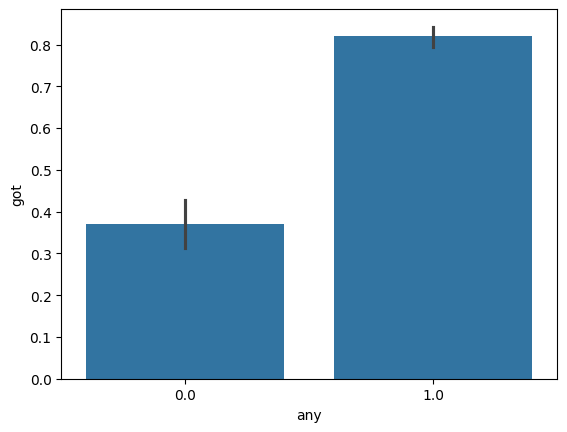

In [18]:
sns.barplot(data = hiv_complete, x = "any", y = "got")

#### Follow Up Study
- Thornton conducted a follow-up interview several months after providing cash incentives to respondents.
- The objective was to assess the subsequent health behaviors of the participants and their condom purchase choices.
- By leveraging the randomized assignment of incentives for learning HIV status, she was able to isolate the causal effect of - learning on condom purchase, serving as a proxy for engaging in risky sexual behavior.

<Axes: xlabel='got', ylabel='usecondom04'>

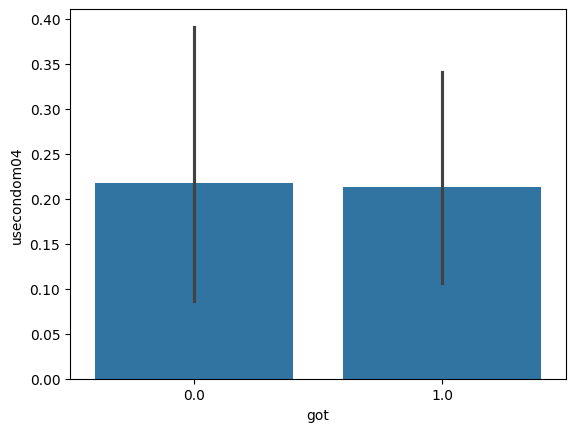

In [19]:
sns.barplot(data = hiv_complete[hiv_complete["hiv2004"]==1], x = "got", y = "usecondom04")

<Axes: xlabel='got', ylabel='bought'>

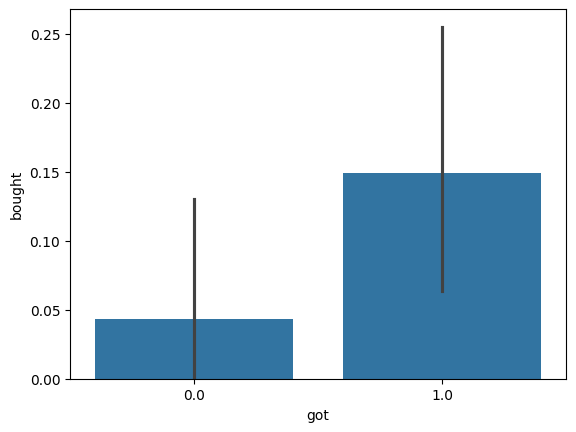

In [20]:
sns.barplot(data = hiv_complete[hiv_complete["hiv2004"]==1], x = "got", y = "bought")

### Conclusion
- Respondents who received any cash-value voucher were twice as likely to visit the VCT compared to those without compensation.
- Even small incentives, resulted in positive behavior regarding seeking HIV test results.
- Thornton demonstrated that even modest financial incentives could effectively encourage individuals to learn their HIV status, with important policy implications.

### Insight
- The findings suggested that outreach strategies like door-to-door testing, coupled with incentives, motivated people to learn their HIV status.
- Nonetheless, being incentivized to learn one's HIV status did not necessarily lead HIV-positive individuals to reduce engagement in high-risk sexual behaviors, such as unprotected sex.
- The study highlighted the importance of considering additional interventions and approaches beyond mere knowledge of HIV status to promote safer sexual practices.

#  Wage on The Employment
---

### Background

- Many people’s common beliefs about the negative effects of the minimum wage.
- In competitive labor markets, an increase in minimum wages may reduce employment. But in monopsony labor markets, minimum wages can actually increase employment.
- The impact of minimum wages on employment is an empirical question influenced by local contextual factors.
- Card and Krueger (1994) aimed to determine whether minimum wages were ultimately harmful or helpful in a specific local economy.

### The Study
- Start with a simple thought experiment to explore the effects of minimum wages on employment.
  - Imagine having a billion dollars to run a randomized experiment.
  - Going across hundreds of local labor markets in the United States.
  - Flip a coin to determine the treatment: heads for raising the minimum wage, tails for maintaining the status quo.
- This thought experiment does clarify both the research design and the causal question, however that scenario is impossible at that time
- Since a randomized experiment was not possible, Card and Krueger (1994) used a next-best solution.
- Do comparison of two neighboring states: New Jersey and Pennsylvania. **They assumed both state have similar trend of employment, we call it as parallel trends assumption**
  - New Jersey planned to increase its minimum wage from `$4.25` to `$5.05` in November 1992.
  - Pennsylvania's minimum wage remained at $4.25.
- By comparing the states before and after the minimum-wage increase they evaluated its effect. The method used in their study is called as Difference in Differences

### Objective

### Load Data

- The dataset is adapted from the dataset in Card and Krueger (1994)
- A survey of fast-food restaurants was conducted in both states, New Jersey (0) and Pennsylvania (1) were collected in February 1992 (before minimum wage raised in New Jersey) and in November 1992 (after minimum wage raised in New Jersey).
- 384 restaurants in total after removing null values

In [22]:
employment = pd.read_csv("employment.csv")
employment

,state,total_emp_feb,total_emp_nov
0,0,40.50,24.00
1,0,13.75,11.50
2,0,8.50,10.50
3,0,34.00,20.00
4,0,24.00,35.50
...,...,...,...
379,1,9.00,23.75
380,1,9.75,17.50
381,1,24.50,20.50
382,1,14.00,20.50


### Difference in Differences

#### Using Simple Mean Calculation

In [23]:
# Group by state, calculate mean in February (before) and November (after)
emp_per_state = employment.groupby('state').mean()
emp_per_state

,total_emp_feb,total_emp_nov
state,,
0,23.380000,21.096667
1,20.430583,20.897249


In [24]:
mean_emp_pa_before = emp_per_state.iloc[0, 0]
mean_emp_pa_after = emp_per_state.iloc[0, 1]
mean_emp_nj_before = emp_per_state.iloc[1, 0]
mean_emp_nj_after = emp_per_state.iloc[1, 1]

print(f'mean PA employment before: {mean_emp_pa_before:.2f}')
print(f'mean PA employment after: {mean_emp_pa_after:.2f}')
print(f'mean NJ employment before: {mean_emp_nj_before:.2f}')
print(f'mean NJ employment after: {mean_emp_nj_after:.2f}')

mean PA employment before: 23.38
mean PA employment after: 21.10
mean NJ employment before: 20.43
mean NJ employment after: 20.90


In [25]:
pa_diff = mean_emp_pa_after - mean_emp_pa_before
print(f'difference of mean PA employment: {pa_diff:.2f}')

difference of mean PA employment: -2.28


In [26]:
nj_diff = mean_emp_nj_after - mean_emp_nj_before
print(f'difference of mean NJ employment: {nj_diff:.2f}')

difference of mean NJ employment: 0.47


In [27]:
did = nj_diff - pa_diff

print(f'DiD in mean employment is {did:.2f}')

DiD in mean employment is 2.75


- Difference in differences estimate is the estimated effect of minimum wage increase
- The estimated effect is 2.75 additional mean full-time-equivalent employment.

### DiD Using Regression

The same DID result can be obtained via regression

$$Y = \alpha + \gamma NJ + \lambda D + \delta (NJ \times D) + \varepsilon$$
- $Y$ is total employment
- $NJ$ is a dummy equal to 1 if the observation is from NJ, 0 if the observation is from PA
- $D$ is a dummy equal to 1 if the observation is from November (the post period), 0 if the observation is from February (the pre period)

- If setting the dummies equal to one and/or zero, we will know that:
  - PA Pre: $\alpha$
  - PA Post: $\alpha$ + $\lambda$
  - NJ Pre: $\alpha$ + $\gamma$
  - NJ Post: $\alpha$ + $\gamma$+ $\lambda$+ $\delta$

In [28]:
# Get employment in February and the state
df_before = employment[['total_emp_feb', 'state']]

# Set 0 for employment from Feb
df_before['D'] = 0

# Renaming columns for simplicity
df_before.columns = ['total_emp', 'NJ', 'D']

In [29]:
# Get employment in NOvember and the state
df_after = employment[['total_emp_nov', 'state']]

# Set 1 for employment from Nov
df_after['D'] = 1

# Renaming columns for simplicity
df_after.columns = ['total_emp', 'NJ', 'D']

In [30]:
# Concat both data
df_reg = pd.concat([df_before, df_after])

# Create the interaction
df_reg['NJ_D'] = df_reg["NJ"] * df_reg["D"]

# Shows whole data
df_reg

,total_emp,NJ,D,NJ_D
0,40.50,0,0,0
1,13.75,0,0,0
2,8.50,0,0,0
3,34.00,0,0,0
4,24.00,0,0,0
...,...,...,...,...
379,23.75,1,1,1
380,17.50,1,1,1
381,20.50,1,1,1
382,20.50,1,1,1


In [31]:
# Create OLS model object
model = smf.ols('total_emp ~ NJ + D + NJ_D', data = df_reg)

# Fit the model
results = model.fit()

# Print the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              total_emp   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.947
Date:                Fri, 18 Jul 2025   Prob (F-statistic):              0.121
Time:                        22:01:46   Log-Likelihood:                -2817.6
No. Observations:                 768   AIC:                             5643.
Df Residuals:                     764   BIC:                             5662.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.3800      1.098     21.288      0.0

by the definition of equation, the $\alpha$, $\gamma$, $\lambda$, and $\delta$ respectively is 20.43, 2.95, 0.47, and 2.75

$$Y = 23.38 - 2.95NJ - 2.287D + 2.75 (NJ \times D) + \varepsilon$$


/tmp/ipython-input-32-1862442086.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta0_hat = results_[0]
/tmp/ipython-input-32-1862442086.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta1_hat = results_[1]
/tmp/ipython-input-32-1862442086.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta2_hat = results_[2]
/tmp/ipython-input-32-1862442086.py:20: FutureWarning: Series.__getitem__ treating keys as positions is de

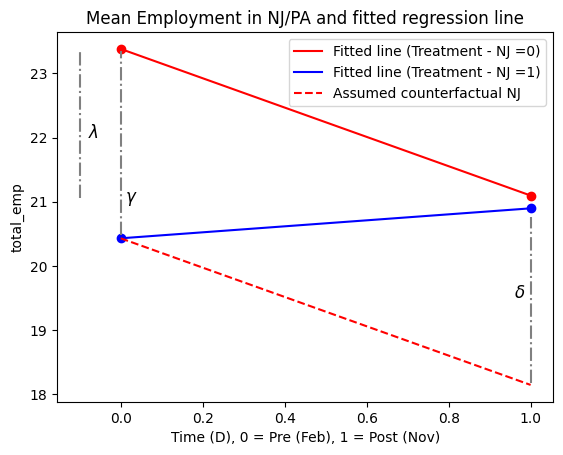

In [32]:
predictors = ["NJ","D","NJ_D"]
outcome = "total_emp"
data = df_reg.copy()
results_ = results.params
linestyles = {0 : "-", 1: "-"}
c = {0 : "r", 1: "b"}
markers = {0 : "x", 1: "."}

# Plot the mean of employment in each state
plt.plot(0, mean_emp_pa_before, c = 'r', marker = "o")
plt.plot(1, mean_emp_pa_after, c = 'r', marker = "o")

plt.plot(0, mean_emp_nj_before, c = 'b', marker = "o")
plt.plot(1, mean_emp_nj_after, c = 'b', marker = "o")

# Calculate the fitted values for two lines regarding the mom_hs
beta0_hat = results_[0]
beta1_hat = results_[1]
beta2_hat = results_[2]
beta3_hat = results_[3]

# Calculate employment prediction
D = data[predictors[0]]
empl_pred = [beta0_hat +  beta1_hat * NJ  + beta2_hat * D + beta3_hat * D * NJ for NJ in range(2)]

# Plot two fitted line from regression
for i in range(2):
    plt.plot(D, empl_pred[i], c = c[i], label = f"Fitted line (Treatment - NJ ={i})", linestyle = linestyles[i])

# Plot assumed counterfactual
fitted_values_counterfact = empl_pred[0] + beta1_hat
plt.plot(D, fitted_values_counterfact, c = "r", label = f"Assumed counterfactual NJ", linestyle = "--")

# Plot the delta as DiD estimate as the effect
plt.axvline(x = 1, ymin = 0.05, ymax = 0.50, c = "grey", linestyle = "-.")
plt.text(0.96, 19.5, f"$\delta$", size =12)

# Plot the gamma and lambda
plt.axvline(x = 0, ymin = 0.45, ymax = 0.95, c = "grey", linestyle = "-.")
plt.text(0.01, 21, f"$\gamma$", size =12)

plt.axvline(x = -0.1, ymin = 0.55, ymax = 0.95, c = "grey", linestyle = "-.")
plt.text(-0.08, 22, f"$\lambda$", size =12)

# Add a legend and labels
plt.legend()
plt.ylabel(f"{outcome}")
plt.xlabel(f"Time ({predictors[1]}), 0 = Pre (Feb), 1 = Post (Nov)")

# Add a title and adjust the margins
plt.title("Mean Employment in NJ/PA and fitted regression line")

# Show the plot
plt.show()

1. Calculate the difference in PA post and pre minimum wage increase (PA_Post - PA_Pre)

- PA Pre: $\alpha$
- PA Post: $\alpha$ + $\lambda$

In [33]:
PA_Pre = results.params[0]
PA_Post = results.params[0] + results.params[1]

/tmp/ipython-input-33-4050796535.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  PA_Pre = results.params[0]
/tmp/ipython-input-33-4050796535.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  PA_Post = results.params[0] + results.params[1]


In [34]:
diff_PA = PA_Post - PA_Pre
diff_PA

np.float64(-2.9494174757282074)

2. Calculate the difference in NJ post and pre minimum wage increase (NJ_Post - NJ_Pre)

  - NJ Pre: $\alpha$ + $\gamma$
  - NJ Post: $\alpha$ + $\gamma$+ $\lambda$+ $\delta$

In [35]:
NJ_Pre = results.params[0] + results.params[2]
NJ_Post = results.params[0]+ results.params[1]+ results.params[2]+ results.params[3]

/tmp/ipython-input-35-250447162.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  NJ_Pre = results.params[0] + results.params[2]
/tmp/ipython-input-35-250447162.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  NJ_Post = results.params[0]+ results.params[1]+ results.params[2]+ results.params[3]


In [36]:
diff_NJ = NJ_Post - NJ_Pre
diff_NJ

np.float64(-0.19941747572812218)

In [37]:
did_reg = (NJ_Post-NJ_Pre) - (PA_Post - PA_Pre)
did_reg

np.float64(2.7500000000000853)

### Conclusion
- By comparing the states before and after the minimum-wage increase, they evaluated its effect.
- The result of the study yielded a surprising result that challenged expectations.
- **They estimated the effect of minimum wage increase is 2.75 additional mean full-time-equivalent employment.**
- The positive value contradicted the assumption of competitive input markets, where a negative value would have been expected.
- The unexpected findings highlight the importance of critically analyzing results and questioning assumptions in economic research.

## Reference
- Causal Inference: The Mixtape by Scott Cunningham
- Causal Inference for the Brave and True by Matheus Facure Alves
- Mixtape Sessions by Scott Cunningham
- Thornton, Rebecca L. 2008. “The Demand for, and Impact of, Learning HIV Status.” American Economic Review 98 (5): 1829–63.